In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "../analytic-1.0.txt"


In [38]:
#parse the file, you might wanna make this into a function for showing all integrators
data = []

with open(file_path, 'r') as file:
  lines = file.readlines()
  i = 0
  j = 0
  while i < len(lines):
    if j == 0:
      time = float(lines[i].strip())
      j = 1
    elif j ==1:
      parts = lines[i].split()
      position = float(parts[0])
      #velocity = float(parts[1])
      data.append((time, position))
      j = 0

    i += 1

r, t = zip(*data)

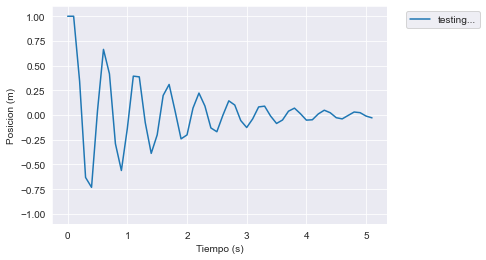

In [39]:
sns.set_style("darkgrid")
plt.tight_layout()
plt.plot(r, t, label=f'testing...')

plt.ylim((-1.1, 1.1))

plt.xlabel('Tiempo (s)')
plt.ylabel('Posicion (m)')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()